In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [4]:
df = pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df = df.rename(columns={"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"})
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
df.shape

(21, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Text(0, 0.5, 'Delivery Time')

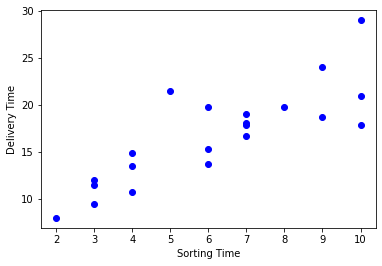

In [9]:
plt.plot(df.Sorting_Time,df.Delivery_Time,"bo")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

In [10]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1d90faf0c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1d90fb05220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d90faf0940>],
 'medians': [<matplotlib.lines.Line2D at 0x1d90fb057c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d90fb05a90>],
 'means': []}

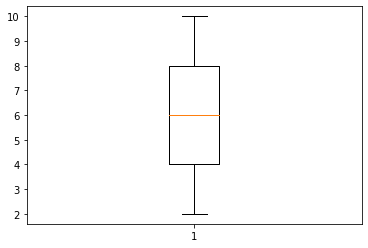

In [11]:
plt.boxplot(df.Sorting_Time)

In [12]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1d90fb6ee80>,
 'caps': [<matplotlib.lines.Line2D at 0x1d90fb7e460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d90fb6ebb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d90fb7ea00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d90fb7ed00>],
 'means': []}

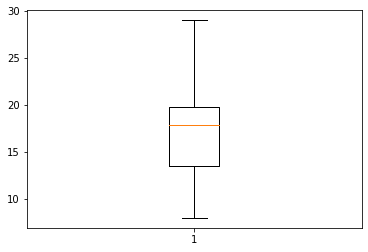

In [13]:
plt.boxplot(df.Delivery_Time)


In [15]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Text(0, 0.5, 'Delivery Time')

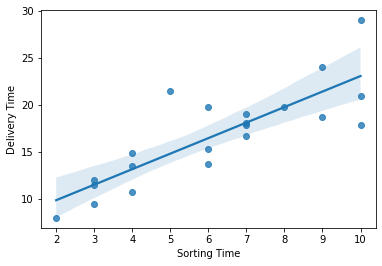

In [16]:
sns.regplot(x="Sorting_Time",y="Delivery_Time",data=df)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")  

In [18]:
model = smf.ols("Delivery_Time~Sorting_Time",data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           3.98e-06
Time:                        13:04:07   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model2 = smf.ols("Delivery_Time~np.log(Sorting_Time)",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           2.64e-06
Time:                        13:04:40   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model3 = smf.ols("np.log(Delivery_Time)~Sorting_Time",data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 29 Sep 2022   Prob (F-statistic):           1.59e-06
Time:                           13:05:04   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df["Sorting_Sq"]=df.Sorting_Time*df.Sorting_Time
df

,Delivery_Time,Sorting_Time,Sorting_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [22]:
model4 = smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Sq",data = df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Thu, 29 Sep 2022   Prob (F-statistic):           2.20e-06
Time:                           13:06:11   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time     0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Sq      -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Standardized Residual')

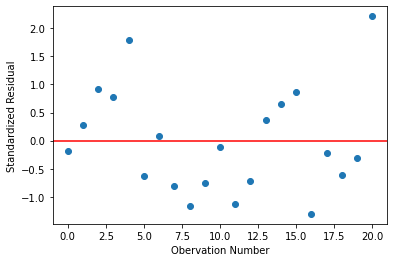

In [26]:
plt.plot(model4.resid_pearson,"o")
plt.axhline(y=0,color="red")
plt.xlabel("Obervation Number")
plt.ylabel("Standardized Residual")

In [ ]:
#model 4 is the best mode as its R2 value is - >  0.765 highest among 4 

# 2

In [27]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [29]:
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0, 0.5, 'Salary')

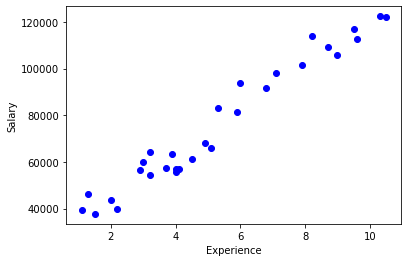

In [30]:
plt.plot(df.YearsExperience,df.Salary,"bo")
plt.xlabel("Experience")
plt.ylabel("Salary")

In [31]:
df.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Shalini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


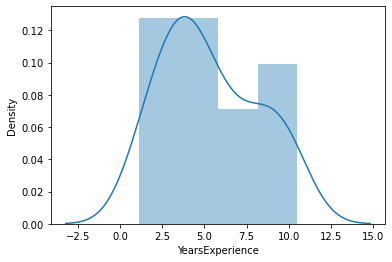

In [32]:
sns.distplot(df.YearsExperience)
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Salary', ylabel='Density'>

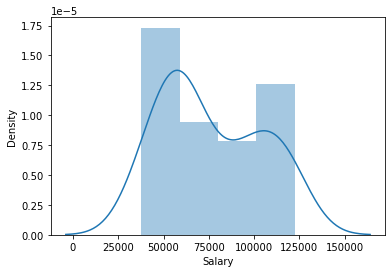

In [33]:
sns.distplot(df.Salary)

Text(0, 0.5, 'Salary')

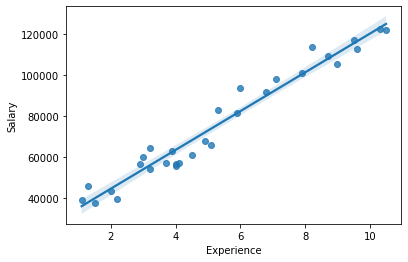

In [34]:
sns.regplot(x="YearsExperience",y="Salary",data=df)
plt.xlabel("Experience")
plt.ylabel("Salary")

In [35]:
model1 = smf.ols("Salary~YearsExperience",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        13:21:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Standardized Residual')

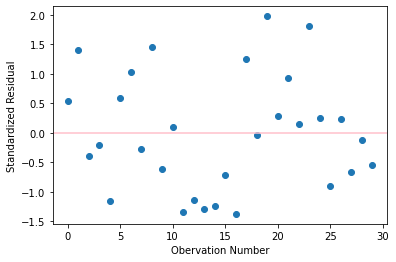

In [36]:
plt.plot(model1.resid_pearson,"o")
plt.axhline(y=0,color="pink")
plt.xlabel("Obervation Number")
plt.ylabel("Standardized Residual")

In [37]:
model2 = smf.ols("Salary~np.log(YearsExperience)",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           3.25e-13
Time:                        13:28:56   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model3 = smf.ols("np.log(Salary)~YearsExperience",data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           7.03e-18
Time:                        13:29:24   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""